#Case Study 2 : Analyzing data from MovieLens
** Due Date: October 5, 11:59PM**

*------------

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1
    
    member 2
    
    ...

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6 Pg 171-172,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to Chapter 1 of Python for Data Analysis book above.

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

#Problem 1: Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

##Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [1]:
import pandas as pd
#---------------------------------------------

# Read in the user data into a DataFrame
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None,
names=unames)

# Read in the rating data into a DataFrame
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None,
names=rnames)

# Read in the movie data into a Data Frame
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None,
names=mnames)

In [2]:
# Merge all the data into one DataFrame
data = pd.merge(pd.merge(ratings, users), movies)

In [3]:
# Save the data file into an HDF5 file.
data.to_hdf('data.h5','movies')

In [4]:
# Create a pivot table to aggregate the data.  Need to make a copy of sort in place.
mean_ratings = data.pivot_table(values='rating', rows='title', aggfunc='mean').copy()
mean_ratings.sort(ascending=False)
mean_ratings[:15]

title
Gate of Heavenly Peace, The (1995)                              5.000000
Lured (1947)                                                    5.000000
Ulysses (Ulisse) (1954)                                         5.000000
Smashing Time (1967)                                            5.000000
Follow the Bitch (1998)                                         5.000000
Song of Freedom (1936)                                          5.000000
Bittersweet Motel (2000)                                        5.000000
Baby, The (1973)                                                5.000000
One Little Indian (1973)                                        5.000000
Schlafes Bruder (Brother of Sleep) (1995)                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                             4.800000
Lamerica (1994)                                                 4.750000
Apple, The (Sib) (1998)                                         4.666667
Sanjuro (1962)                               

In [5]:
# Create a pivot table to aggregate the data
mean_ratings = data.pivot_table(values='rating', rows='title', cols='gender', aggfunc='mean')
# Only print out movies with at least one Male rating
mean_ratings[mean_ratings['M'].notnull()].sort('M',ascending=False)['M']

title
Schlafes Bruder (Brother of Sleep) (1995)      5.000000
Ulysses (Ulisse) (1954)                        5.000000
Lured (1947)                                   5.000000
Follow the Bitch (1998)                        5.000000
Angela (1995)                                  5.000000
Small Wonders (1996)                           5.000000
Baby, The (1973)                               5.000000
Smashing Time (1967)                           5.000000
Gate of Heavenly Peace, The (1995)             5.000000
Dangerous Game (1993)                          5.000000
Bells, The (1926)                              5.000000
Time of the Gypsies (Dom za vesanje) (1989)    4.833333
I Am Cuba (Soy Cuba/Ya Kuba) (1964)            4.750000
Window to Paris (1994)                         4.666667
Lamerica (1994)                                4.666667
...
Get Over It (1996)                                              1
White Boys (1999)                                               1
Mutters Courage (1

In [6]:
# Create a pivot table to aggregate the data
mean_ratings = data[data['age'] > 30].pivot_table(values='rating', rows='title', cols='gender', aggfunc='median')
# Only print out movies with at least one Male rating
print (mean_ratings[mean_ratings['M'].notnull()].sort('M',ascending=False)['M'] > 4.5).nonzero()
print (mean_ratings[mean_ratings['F'].notnull()].sort('F',ascending=False)['F'] > 4.5).nonzero()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85]),)
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 1

#Problem 2: Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

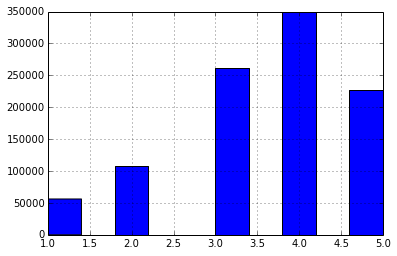

In [7]:
import matplotlib.pylab as py
data['rating'].hist()

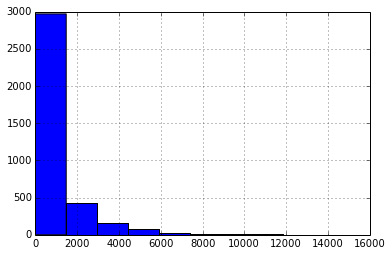

In [8]:
total_ratings = data.pivot_table(values='rating', rows='title', aggfunc='sum')
total_ratings.hist()

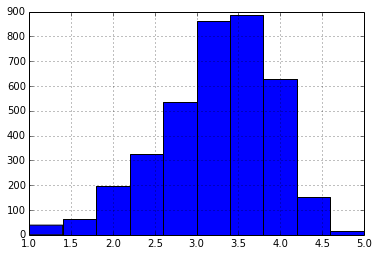

In [9]:
mean_ratings = data.pivot_table(values='rating', rows='title', aggfunc='mean')
mean_ratings.hist()
savefig('mean_rating.png')

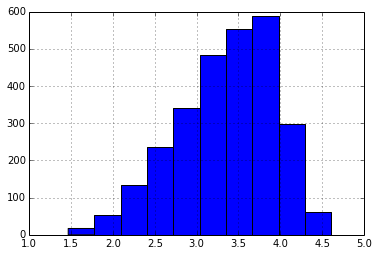

In [10]:
mean_ratings[total_ratings > 100].hist()
savefig('mean_rating_at_least_100.png')

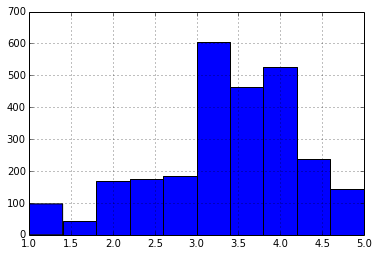

In [11]:
mean_ratings = data[data['age'] < 16].pivot_table(values='rating', rows='title', aggfunc='mean')
mean_ratings.hist()
savefig('mean_rating_lt_16.png')

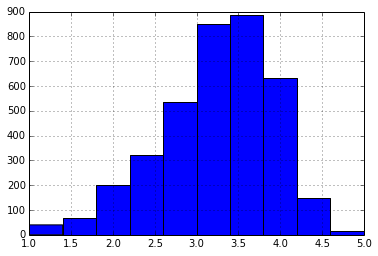

In [12]:
mean_ratings = data[data['age'] > 16].pivot_table(values='rating', rows='title', aggfunc='mean')
mean_ratings.hist()
savefig('mean_rating_gt_16.png')

*------------------------

#Problem 3: Correlation:  Men versus women


* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

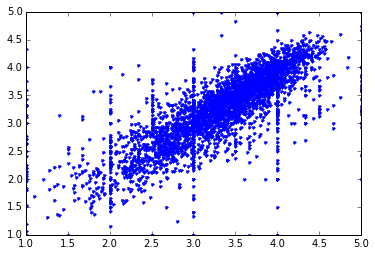

In [13]:
mean_ratings = data.pivot_table(values='rating', rows='title', cols='gender',aggfunc='mean')
plot(mean_ratings['F'],mean_ratings['M'],'.')

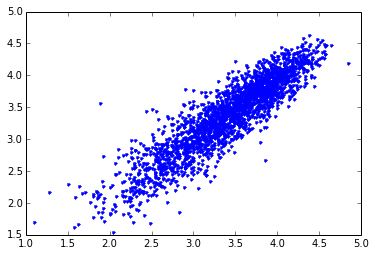

In [14]:
total_ratings = data.pivot_table(values='rating', rows='title', aggfunc='sum')
mean_ratings = data.pivot_table(values='rating', rows='title', cols='gender',aggfunc='mean')
plot(mean_ratings[total_ratings>200]['F'],mean_ratings[total_ratings>200]['M'],'.')

In [15]:
mean_ratings = data.pivot_table(values='rating', rows='title', cols='gender',aggfunc='mean')
mean_ratings.corr()

gender,F,M
gender,,
F,1.00000,0.76319
M,0.76319,1.00000


In [16]:
mean_ratings = data[data['age'] < 16].pivot_table(values='rating', rows='title', cols='gender',aggfunc='mean')
print mean_ratings.corr()
mean_ratings = data[data['age'] > 16].pivot_table(values='rating', rows='title', cols='gender',aggfunc='mean')
print mean_ratings.corr()
mean_ratings = data[data['age'] > 40].pivot_table(values='rating', rows='title', cols='gender',aggfunc='mean')
print mean_ratings.corr()

gender         F         M
gender                    
F       1.000000  0.347884
M       0.347884  1.000000

[2 rows x 2 columns]
gender         F         M
gender                    
F       1.000000  0.764212
M       0.764212  1.000000

[2 rows x 2 columns]
gender         F         M
gender                    
F       1.000000  0.653838
M       0.653838  1.000000

[2 rows x 2 columns]


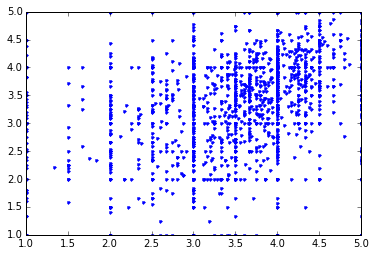

In [17]:
mean_ratings = data[data['age'] < 16].pivot_table(values='rating', rows='title', cols='gender',aggfunc='mean')
plot(mean_ratings['F'],mean_ratings['M'],'.')
savefig('correlation_lt_16.png')

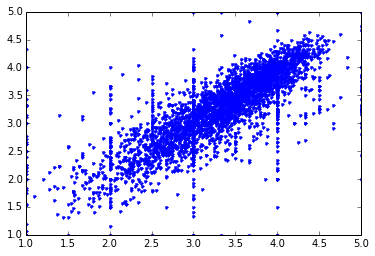

In [18]:
mean_ratings = data[data['age'] > 16].pivot_table(values='rating', rows='title', cols='gender',aggfunc='mean')
plot(mean_ratings['F'],mean_ratings['M'],'.')
savefig('correlation_gt_16.png')

*------------------------

#Problem 4: Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  Convince your boss that your conjecture is correct!

Kids are unpredictable, but adults seem to have a lot more structure to their
ratings.  Let's spend our money making movies for people over age 16!

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501_f14a] Case study 2".